<center><h2> Quantum Scattering from Three Disks </h2>  </center>

The time dependent Schroedinger
equation 
$$
i\hbar \frac {\partial \psi(x,z)}{\partial t}  =  -\frac{\hbar^2}{2m} \Bigl ( \frac{\partial^2 \psi(x,z)}{\partial x^2} +  \frac{\partial^2 \psi(x,z)}{\partial z^2}\Bigr )
+ V(x,z) \psi 
$$
is solved for scattering of  the Gaussian wave packet
$$
\psi(x,z) =  \exp(i(k_0 x +k_1 z))\exp(-A(x-x_i)^2-A(z-z_i)^2) 
$$ from three disks fixed to the vertices of an equilateral triangle. 

<IPython.core.display.Javascript object>


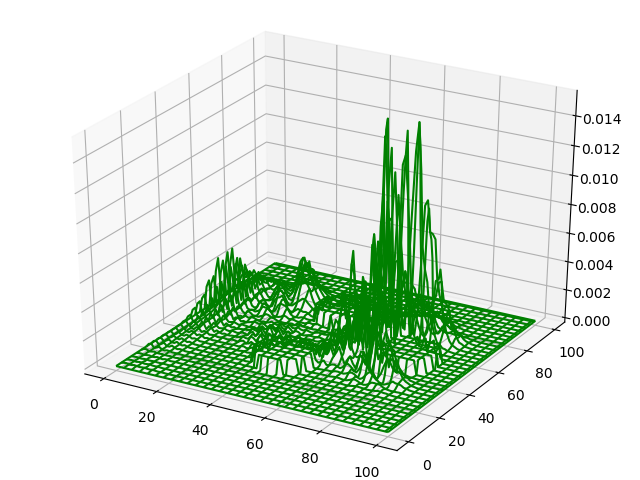

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
finito


In [1]:
"" "From COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS",
    "    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    "    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia,
    "    C Bordeianu, Univ Bucharest, 2020.
    "    Please respect copyright & acknowledge our work. ""

# 3QMDisks.ipynb # Quantum scattering from three hard disks

% matplotlib notebook
import matplotlib.pylab as p
import  numpy as np
from mpl_toolkits.mplot3d import Axes3D

x1 = 51              
r = 10                       # radius of disks
xmax = 100                   
nmax = 101                   
V = np.zeros((nmax,nmax),float) # potential
dx  =  0.1                   # increment dx = dz
dx2  =  dx*dx                
k0  = 20.                    # wave packet x wave vector 
k1 = 0.                      # wave packet z wave vector
dt  =  0.002                 
fc = dt/dx2                  # factor
Re = np.zeros((nmax,nmax),float)    # Real psi
I = np.zeros((nmax,nmax),float)    # Im psi
psi = np.zeros((nmax,nmax),float)

def pot(xa,ya):            # potential of disk with center (xa,za)
     for i in range (ya-r, ya+r+1):   # r : disk radius, 
        for j in range(xa-r, xa+r+1): # to ends of disk x
            if np.sqrt((i-ya)**2+(j-xa)**2) <= r:  # Defines potential
                V[i,j] = 5.    # equivalent to infinite potential
                   
def potential():
    pot(30,45)  # center of each ring
    pot(70,45)
    pot(50,80)   
    
def initial(xin,yin):        # initial position of wave packet (xin,zin)     
    for i in np.arange(0,nmax):
        for j in np.arange(0, nmax):
             Re[i,j] = np.exp(-0.03*(i-yin)**2- 0.03*(j-xin)**2)*np.cos(k0*i+k1*j)
             I[i,j] = np.exp(-0.03*(i-yin)**2-0.03*(j-xin)**2)*np.sin(k0*i+k1*j)
            
def plotinitial():
    for i in range(1,nmax-1):
        for j in range(1,nmax-1): 
            if V[i,j] != 0:    # wave function is zero when potential is != 0
                Re[i,j] = 0
                I[i,j] = 0
            psi[i,j]  =  (Re[i,j ]**2 +I[i, j ]**2)+0.01*V[i,j]             

def funcz(psi):
    z  =  psi[X,Y]                        
    return z

potential()       # Potential of disks            
xin = 40         # initial position of wave packet,  0 <= x,y <= 100
yin =  25          
initial(xin,yin)
plotinitial()
ix  =  np.arange(0, 101)
iy  =  np.arange(0,101)
X, Y  =  np.meshgrid(ix, iy)
Z = funcz(psi)
fig  =  p.figure()               # Create figure
ax  =  Axes3D(fig)  
ix  =  np.arange(0, nmax)
iy  =  np.arange(0,nmax)

for t in range(0,150):    # plots wf at time 120
    if t%10 == 0:  print(t)      
    I[1:-1,1:-1] =  I[1:-1,1:-1]+fc*(Re[2: ,1:-1]+Re[:-2 ,1:-1]-4*Re[1:-1,1:-1] + \
                       Re[1:-1,2: ]+Re[1:-1, :-2])+ V[1:-1,1:-1]*dt*Re[1:-1,1:-1]
    Re[1:-1, 1:-1] = Re[1:-1,1:-1]-fc*(I[2: ,1:-1]+I[ :-2,1:-1]-4*I[1:-1,1:-1] \
                       +I[1:-1,2: ]+I[1:-1, :-2])+ V[1:-1,1:-1]*dt*I[1:-1,1:-1]   
    for i in range(1, nmax-1):
        for j in range(1,nmax-1): # psi=0 when V != 0
             if V[i,j] != 0:      # 0 psi causes reflections
                 Re[i,j] = 0
                 I[i,j] = 0
             yy  = 0.1* (Re[i,j ]**2 +I[i, j]**2)+0.0002*V[i,j]  
             psi[i,j] = yy
X, Y  =  np.meshgrid(ix, iy)
Z = funcz(psi)   
ax.plot_wireframe(X, Y, Z, color  =  'g')
print("finito")    
p.show()        